# Trajectory statistics

## INFO!
Die Klasse "unclassified" bedeuted, dass diesen Fragmenten manuell noch keine Klasse zugeordnet wurde. Aktuell fallen darunter alle Aufnahmen der Uni Münster, außer "3_m-h-h" bzw. "mu-3".


In [1]:
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

## Load statistics

In [2]:

FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

# To generate a new stats file run the script save_trajectory_proj_and_stats.py!
STATS_BASE_DIR = Path("output/statistics/hist/")

# contains segmented mu trajectories; Will be counted as class "unclassified"
separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")

# contains classified trajectories
# ds4: tf100ms_2024-08-31_20-56-44 ?
# ds6: tf100ms_2024-08-31_21-01-56
classified = pd.read_csv(STATS_BASE_DIR / "tf100ms_ds5" / "all_fragments.csv")

print(separated_mu.columns)
print(classified.columns)

display(classified)

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s', 'frag_std'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s,frag_std
0,hn-bee-1,0,0,bee,22690,3.58,808,0.1,1.83
1,hn-bee-1,0,1,bee,22690,3.58,629,0.1,1.39
2,hn-bee-1,0,2,bee,22690,3.58,724,0.1,1.85
3,hn-bee-1,0,3,bee,22690,3.58,761,0.1,1.66
4,hn-bee-1,0,4,bee,22690,3.58,847,0.1,2.27
...,...,...,...,...,...,...,...,...,...
9020,mu-3,9,260,bee,686813,26.41,409,0.1,2.93
9021,mu-3,9,261,bee,686813,26.41,597,0.1,3.58
9022,mu-3,9,262,bee,686813,26.41,505,0.1,2.70
9023,mu-3,9,263,bee,686813,26.41,2907,0.1,3.16


In [3]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,mu-1,0,0,unclassified,1015970,40.43,43,0.1
1,mu-1,0,1,unclassified,1015970,40.43,14,0.1
2,mu-1,0,2,unclassified,1015970,40.43,290,0.1
3,mu-1,0,3,unclassified,1015970,40.43,630,0.1
4,mu-1,0,4,unclassified,1015970,40.43,450,0.1


In [4]:
# Combine dataframes
classified_scenes = classified["scene"].unique()
unclassified_mu = separated_mu[~separated_mu["scene"].isin(classified_scenes)]
df = pd.concat([classified, unclassified_mu])

print("total number of fragments:", len(df.index))
print("total number of classified fragments:", len(classified.index))
print("unclassified mu scenes:", unclassified_mu["scene"].unique())
print("mu total fragments:", len(separated_mu.index), ", mu unclassified fragments:", len(unclassified_mu.index))

# combine all
# df = pd.concat([combined_mu, classified_pf])
# display(df["scene"].unique())
# print("Total fragment count:", len(df))

total number of fragments: 12333
total number of classified fragments: 9025
unclassified mu scenes: ['mu-1' 'mu-2' 'mu-4' 'mu-5' 'mu-6']
mu total fragments: 6383 , mu unclassified fragments: 3308


## Class overview
### Number of trajectories per class

class
bee              66
bumblebee        47
butterfly        21
dragonfly       112
insect           70
unclassified    152
wasp             83
dtype: int64

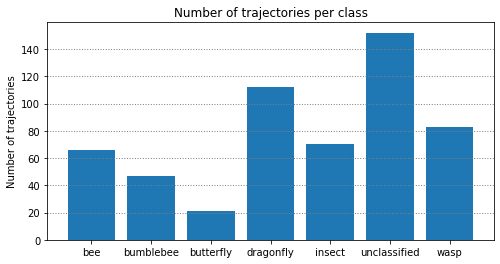

In [5]:
# gesucht: Anzahl instances pro Klasse
# group by class
# unique over scene and instance_id
df1 = df.groupby("class").apply(lambda x: len(x[["scene", "instance_id"]].drop_duplicates()))
display(df1)

plt.figure(figsize=(8,4))
plt.bar(df1.index, df1)
plt.title("Number of trajectories per class")
plt.ylabel("Number of trajectories")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of trajectories per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

## Number of Fragments per class grouped by event count


,all,below_2048,2048_to_4096,over_2048,over_4096
class,,,,,
bee,3687,3368,194,319,125
bumblebee,561,214,110,347,237
butterfly,1062,844,134,218,84
dragonfly,2160,1261,493,899,406
insect,527,417,54,110,56
unclassified,3308,2711,123,597,474
wasp,1028,925,70,103,33


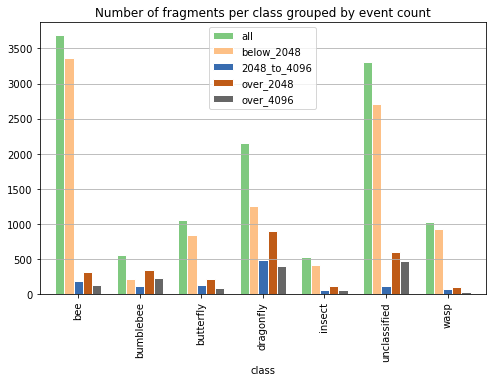

In [6]:
df_frags_per_class = pd.DataFrame()
df_frags_per_class["all"] = df.groupby("class").size()
df_frags_per_class["below_2048"] = df[df["frag_evnt_count"] < 2048].groupby("class").size()
df_frags_per_class["2048_to_4096"] = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] < 4096)].groupby("class").size()
df_frags_per_class["over_2048"] = df[df["frag_evnt_count"] >= 2048].groupby("class").size()
df_frags_per_class["over_4096"] = df[df["frag_evnt_count"] >= 4096].groupby("class").size()

ax = df_frags_per_class.plot(y=["all", "below_2048", "2048_to_4096", "over_2048", "over_4096"], \
                            kind="bar", colormap="Accent", edgecolor='white', width=0.75, \
                            title="Number of fragments per class grouped by event count")
ax.grid(axis="y")
ax.figure.set_size_inches(8,5)

display(df_frags_per_class)


## Fragment event count

In [7]:
df0 = df[["frag_evnt_count","frag_len_s"]]

df1 = df0.mean()
print("Mean overall values (all fragments)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 2048].mean()
print("Mean overall values (>= 2048)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].mean()
print("Mean overall values (>= 4096)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].median()
print("Median overall values (>= 4096)")
display(df1)

Mean overall values (all fragments)


frag_evnt_count    2710.66
frag_len_s            0.10
dtype: float64

Mean overall values (>= 2048)


frag_evnt_count    11396.78
frag_len_s             0.10
dtype: float64

Mean overall values (>= 4096)


frag_evnt_count    18461.11
frag_len_s             0.10
dtype: float64

Median overall values (>= 4096)


frag_evnt_count    8371.0
frag_len_s            0.1
dtype: float64

## Fragment event count per class

In [8]:

df1 = df.groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (all fragments)")
display(df1["frag_evnt_count"])

df1 = df[(df["frag_evnt_count"] < 2048)].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (n < 2048)")
display(df1["frag_evnt_count"])

df2 = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] <= 4096)].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (2048 <= n <= 4096)")
display(df2["frag_evnt_count"])

df3 = df[df["frag_evnt_count"] > 4096].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (> 4096)")
display(df3["frag_evnt_count"])

Mean fragment event count per class (all fragments)


class
bee              631.34
bumblebee       6054.73
butterfly       2161.73
dragonfly       2698.74
insect          3355.21
unclassified    5068.60
wasp            1017.49
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (n < 2048)


class
bee             279.19
bumblebee       883.14
butterfly       573.50
dragonfly       801.22
insect          459.04
unclassified    183.47
wasp            612.19
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (2048 <= n <= 4096)


class
bee             2850.23
bumblebee       2938.47
butterfly       2958.90
dragonfly       2974.06
insect          2860.07
unclassified    2805.54
wasp            2728.19
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (> 4096)


class
bee              6675.86
bumblebee       12170.81
butterfly       16847.99
dragonfly        8257.96
insect          25398.82
unclassified    33595.96
wasp             8749.42
Name: frag_evnt_count, dtype: float64

## STD per class

,all,below_2048,2048_to_4096,over_2048,over_4096
class,,,,,
bee,0.92,0.67,3.02,3.35,3.85
bumblebee,2.91,1.62,2.73,3.71,4.17
butterfly,1.88,1.43,2.91,3.58,4.65
dragonfly,2.71,1.82,3.20,3.81,4.54
insect,1.57,0.97,2.67,3.76,4.82
unclassified,NaN,NaN,NaN,NaN,NaN
wasp,1.96,1.82,2.90,3.22,3.90


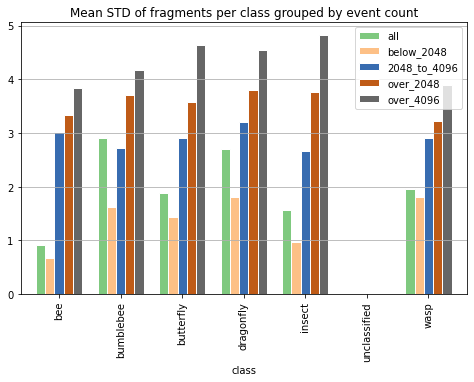

In [9]:
agg = {
    "frag_std":"mean"
}

df_std_per_class = pd.DataFrame()
df_std_per_class["all"] = df.groupby("class").agg(agg)
df_std_per_class["below_2048"] = df[df["frag_evnt_count"] < 2048].groupby("class").agg(agg)
df_std_per_class["2048_to_4096"] = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] < 4096)].groupby("class").agg(agg)
df_std_per_class["over_2048"] = df[df["frag_evnt_count"] >= 2048].groupby("class").agg(agg)
df_std_per_class["over_4096"] = df[df["frag_evnt_count"] >= 4096].groupby("class").agg(agg)

ax = df_std_per_class.plot(y=["all", "below_2048", "2048_to_4096", "over_2048", "over_4096"], \
                            kind="bar", colormap="Accent", edgecolor='white', width=0.75, \
                            title="Mean STD of fragments per class grouped by event count")
ax.grid(axis="y")
ax.figure.set_size_inches(8,5)

display(df_std_per_class)


## Fragment count by minimum fragment STD (>= 2048)

,all,STD > 0,STD > 1,STD > 2,STD > 3,STD > 4,STD > 5
class,,,,,,,
bee,3687,1533.0,1199.0,735.0,302.0,88.0,23.0
bumblebee,561,529.0,510.0,398.0,256.0,142.0,49.0
butterfly,1062,817.0,725.0,482.0,190.0,68.0,31.0
dragonfly,2160,1818.0,1719.0,1319.0,736.0,343.0,172.0
insect,527,334.0,291.0,152.0,71.0,40.0,22.0
unclassified,3308,NaN,NaN,NaN,NaN,NaN,NaN
wasp,1028,818.0,758.0,510.0,194.0,69.0,28.0


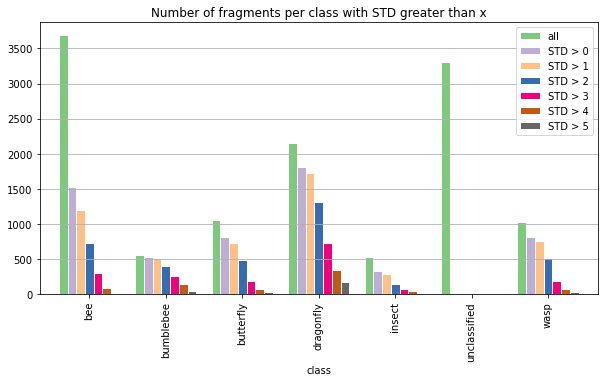

In [10]:
min_stds = [0,1,2,3,4,5]

df_std_per_class = pd.DataFrame()
df_std_per_class["all"] = df.groupby("class").size()
caps = ["all"]
for std in min_stds:
    cap = f"STD > {std}"
    caps.append(cap)
    df_std_per_class[cap] = df[df["frag_std"] > std].groupby("class").size()

ax = df_std_per_class.plot(y=caps, kind="bar", colormap="Accent", edgecolor='white', width=0.8, \
                            title="Number of fragments per class with STD greater than x")
ax.grid(axis="y")
ax.figure.set_size_inches(10,5)

display(df_std_per_class)



,all,STD > 0,STD > 1,STD > 2,STD > 3,STD > 4,STD > 5
class,,,,,,,
bee,319,319.0,318.0,302.0,185.0,69.0,21.0
bumblebee,347,347.0,347.0,330.0,240.0,137.0,47.0
butterfly,218,217.0,214.0,209.0,134.0,41.0,21.0
dragonfly,899,896.0,896.0,871.0,590.0,282.0,139.0
insect,110,108.0,108.0,98.0,57.0,32.0,18.0
unclassified,597,NaN,NaN,NaN,NaN,NaN,NaN
wasp,103,103.0,103.0,94.0,49.0,19.0,10.0


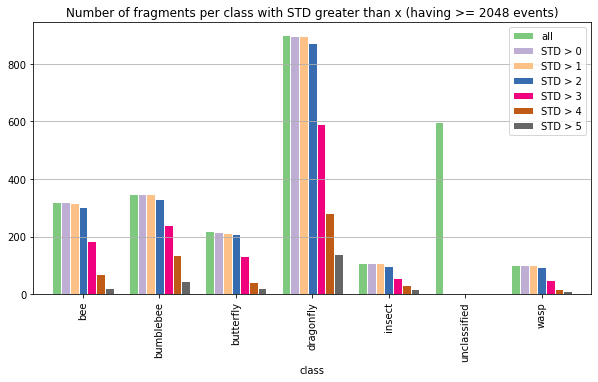

In [11]:
df_ge2048 = df[df["frag_evnt_count"] >= 2048]

min_stds = [0,1,2,3,4,5]

df_std_per_class = pd.DataFrame()
df_std_per_class["all"] = df_ge2048.groupby("class").size()
caps = ["all"]
for std in min_stds:
    cap = f"STD > {std}"
    caps.append(cap)
    df_std_per_class[cap] = df_ge2048[df_ge2048["frag_std"] > std].groupby("class").size()

ax = df_std_per_class.plot(y=caps, kind="bar", colormap="Accent", edgecolor='white', width=0.8, \
                            title="Number of fragments per class with STD greater than x (having >= 2048 events)")
ax.grid(axis="y")
ax.figure.set_size_inches(10,5)

display(df_std_per_class)



## Trajectory stats

Mean number of events per trajectory per class


class
bee             119384.48
bumblebee       122141.14
butterfly        92511.80
dragonfly       159678.38
insect           22317.00
unclassified    253707.81
wasp             30808.14
Name: traj_evnt_count, dtype: float64

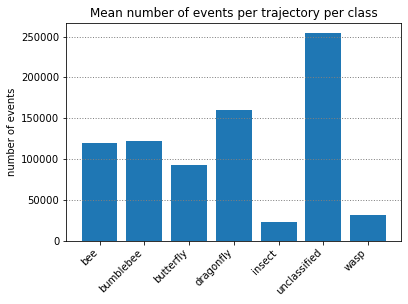

Mean trajectory length (s) per class


class
bee             18.94
bumblebee        9.51
butterfly        8.83
dragonfly       10.62
insect           1.50
unclassified    16.31
wasp             5.14
Name: traj_len_s, dtype: float64

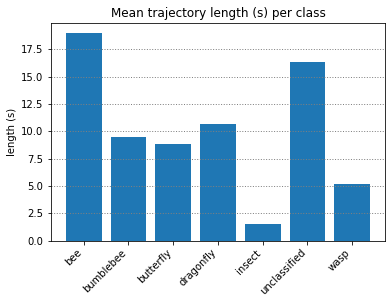

Mean number of events per fragment per class


class
bee             279.19
bumblebee       883.14
butterfly       573.50
dragonfly       801.22
insect          459.04
unclassified    183.47
wasp            612.19
Name: frag_evnt_count, dtype: float64

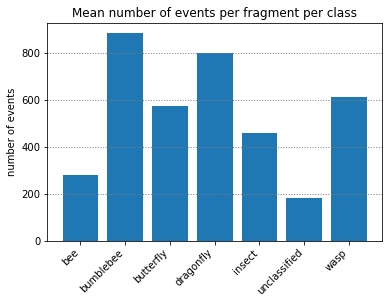

In [12]:
print("Mean number of events per trajectory per class")
display(df1["traj_evnt_count"])
plt.bar(df1.index, df1["traj_evnt_count"])
plt.title("Mean number of events per trajectory per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

print("Mean trajectory length (s) per class")
display(df1["traj_len_s"])
plt.bar(df1.index, df1["traj_len_s"])
plt.title("Mean trajectory length (s) per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("length (s)")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

print("Mean number of events per fragment per class")
display(df1["frag_evnt_count"])
plt.bar(df1.index, df1["frag_evnt_count"])
plt.title("Mean number of events per fragment per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


## Event count / Fragment count histogram

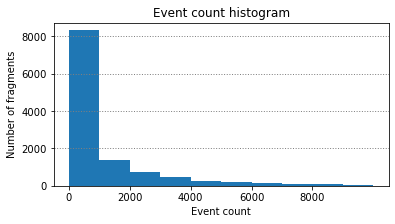

In [13]:
plt.figure(figsize=(6,3))
plt.hist(df["frag_evnt_count"], bins=list(range(0, 1000*10+1, 1000)))
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1000*10, 2000))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram 2.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

## Number of Fragments per scene

### >= 0

scene
hn-bee-1      610
hn-but-2     1213
hn-dra-1      216
hn-was-1       70
hn-was-2      327
hn-was-3      227
hn-was-5      404
mb-bum1-1      44
mb-bum1-2      18
mb-bum1-3      13
mb-bum1-4      33
mb-bum1-5      45
mb-bum2-1     202
mb-bum2-2     582
mb-dra1-1     518
mb-dra2-1    1428
mu-1         1112
mu-2          590
mu-3         3075
mu-4          518
mu-5           61
mu-6         1027
dtype: int64

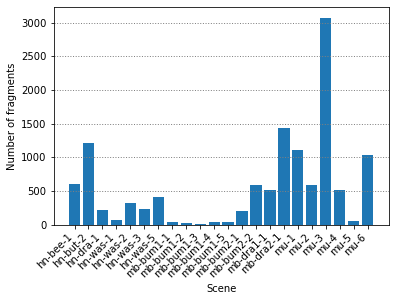

In [14]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


### >= 2048

scene
hn-bee-1      15
hn-but-2     286
hn-dra-1      98
hn-was-1       2
hn-was-2       9
hn-was-3      12
hn-was-5      80
mb-bum1-1     44
mb-bum1-2     17
mb-bum1-3     13
mb-bum1-4     32
mb-bum1-5     39
mb-bum2-1    142
mb-bum2-2    135
mb-dra1-1    266
mb-dra2-1    537
mu-1         430
mu-2         110
mu-3         269
mu-4          25
mu-6          32
dtype: int64

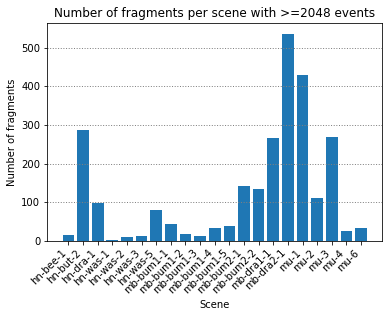

In [15]:
# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

### >= 4096

scene
hn-bee-1       3
hn-but-2     121
hn-dra-1      46
hn-was-2       3
hn-was-3       3
hn-was-5      27
mb-bum1-1     43
mb-bum1-2     16
mb-bum1-3     12
mb-bum1-4     30
mb-bum1-5     32
mb-bum2-1     86
mb-bum2-2     39
mb-dra1-1    133
mb-dra2-1    229
mu-1         373
mu-2          75
mu-3         118
mu-4           4
mu-6          22
dtype: int64

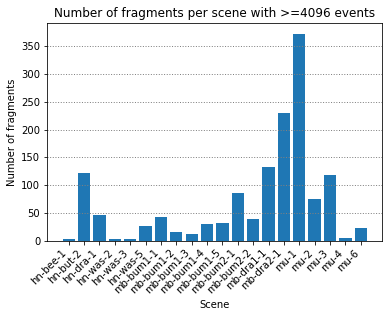

In [16]:
# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

### Number of Fragments per Instance

In [17]:
df1 = df[df["frag_evnt_count"] >= 2048 ].groupby(["scene","instance_id"]).size().sort_values()

print(df1.mean())
print(df1.median())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df1)

8.077881619937695
4.0


scene      instance_id
hn-bee-1   0                1
mu-1       29               1
hn-but-2   36               1
mu-1       28               1
           27               1
           26               1
mb-bum2-2  45               1
mu-1       21               1
mb-bum2-2  47               1
mu-1       4                1
mb-bum1-5  6                1
mb-dra2-1  36               1
           32               1
           26               1
mb-dra1-1  17               1
mb-dra2-1  16               1
           15               1
mb-dra1-1  49               1
           50               1
hn-was-5   1                1
           5                1
           8                1
mb-dra2-1  13               1
hn-was-5   14               1
           20               1
mb-dra1-1  70               1
hn-was-5   42               1
           46               1
           58               1
           55               1
hn-but-2   30               1
mu-2       15               1
hn-dra-1   9     